# MNIST HANDWRITING

Tugas eksplorasi ini melibatkan penggunaan Deep Learning dengan PyTorch untuk mengklasifikasikan digit tulisan tangan dalam dataset MNIST. Silakan buat alur kerja end-to-end Anda sendiri untuk menyelesaikan tugas Klasifikasi Digit Tulisan Tangan ini dengan menggunakan arsitektur Jaringan Saraf Tiruan (Neural Network) tanpa menggunakan Convolutional Neural Network (CNN). Berikut adalah kriteria penilaian yang akan digunakan:

In [ ]:
#Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

###1. Loading your MNIST dataset for the data loader

In [ ]:
# Langkah 1: Muat dataset MNIST dan siapkan data loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Dataset pelatihan
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)

# Dataset pengujian
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 108625093.06it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 45574000.69it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 24427075.76it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1745832.91it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



###2. Visualize several MNIST datasets

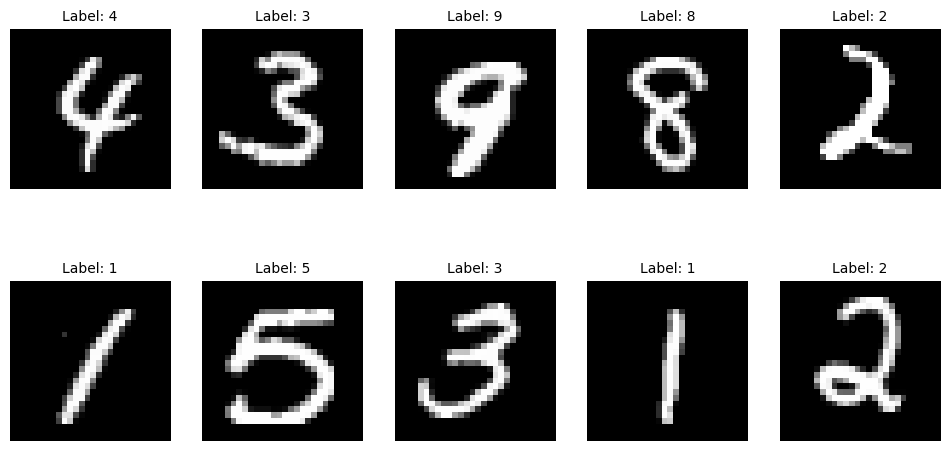

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Tentukan jumlah baris dan kolom untuk tampilan gambar
num_rows = 2
num_cols = 5

# Definisikan fungsi untuk menampilkan gambar
def plot_images(images, labels, num_rows, num_cols):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6))
    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            axs[i, j].imshow(images[index].squeeze().numpy(), cmap='gray')
            axs[i, j].set_title(f"Label: {labels[index].item()}", fontsize=10)
            axs[i, j].axis('off')

# Dapatkan beberapa gambar dan label
images, labels = next(iter(train_loader))

# Tampilkan gambar
plot_images(images[:num_rows * num_cols], labels[:num_rows * num_cols], num_rows, num_cols)
plt.show()

###3. Design your Neural Network model

In [ ]:
# Define the neural network class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(28*28, 100)
        self.linear2 = nn.Linear(100, 50)
        self.final = nn.Linear(50, 10)
        self.relu = nn.ReLU()

    def forward(self, img):
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x

# Create an instance of the neural network
net = Net()


###4. Setup your hyperparameter such as Loss Function, Optimizer, Learning Rate, etc

In [ ]:
# Define the loss function (criterion) and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
num_epochs = 10

###5. Develop a training loop and run a training model

In [ ]:
# Example training loop (you should customize this based on your dataset and requirements)
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):  # Assuming you have a train_loader
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}')

print('Training finished.')


Epoch 1, Loss: 0.17496395853560553
Epoch 2, Loss: 0.16336809425577045
Epoch 3, Loss: 0.1540969156646239
Epoch 4, Loss: 0.1453815566272592
Epoch 5, Loss: 0.13658918045770957
Epoch 6, Loss: 0.12955503088872888
Epoch 7, Loss: 0.12247259772694441
Epoch 8, Loss: 0.11699652683629251
Epoch 9, Loss: 0.11119450921260281
Epoch 10, Loss: 0.10612713133713711
Training finished.


###6. Evaluate the Model using several performance metrics such as accuracy, confusion matrix, F1 Score, Precision, Recall, etc

In [ ]:
# Step 6: Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

accuracy = accuracy_score(all_labels, all_predictions)
confusion = confusion_matrix(all_labels, all_predictions)
classification_report_str = classification_report(all_labels, all_predictions)

print(f"Accuracy: {accuracy * 100}%")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)

Accuracy: 96.32%
Confusion Matrix:
[[ 968    0    1    2    0    3    3    2    1    0]
 [   0 1118    4    1    0    1    4    2    5    0]
 [   6    1 1002    6    2    0    4    7    4    0]
 [   1    0    9  977    0    6    0    8    8    1]
 [   1    0    4    0  945    1    7    2    2   20]
 [   9    1    0    7    2  849    8    3   10    3]
 [  10    3    2    1    5   10  919    1    7    0]
 [   2    6   21    3    2    1    0  982    2    9]
 [   3    1    5   12    3    5    6    6  932    1]
 [   5    6    1   13   17    5    2   12    8  940]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.95      0.96       892
           6       0.96      0.9

###7. Describe and explain your Result

Dalam konteks pemodelan Deep Learning untuk menganalisis atau memprediksi tulisan tangan dalam dataset MNIST, terdapat hubungan positif antara jumlah data yang digunakan untuk pelatihan (train) dan pengujian (test) dengan hasil akurasi. Dengan kata lain, semakin banyak data yang Anda latih dan uji, semakin baik model Anda dalam mengenali digit tulisan tangan, yang tercermin dalam peningkatan persentase akurasi.